In [23]:
import pandas as pd
import numpy as np
import joblib 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [24]:
df = pd.read_csv("data.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


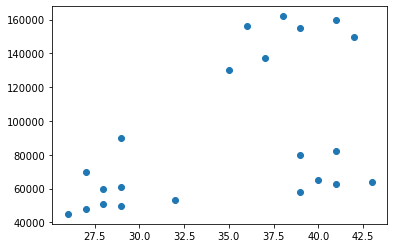

In [25]:
plt.scatter(df['Age'],df['Income($)'])

In [26]:
km  = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [27]:
km.fit(df[['Age','Income($)']])


KMeans(n_clusters=3)

In [28]:
y = km.predict(df[['Age','Income($)']])
y

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [29]:
df['cluster']=y
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


No handles with labels found to put in legend.


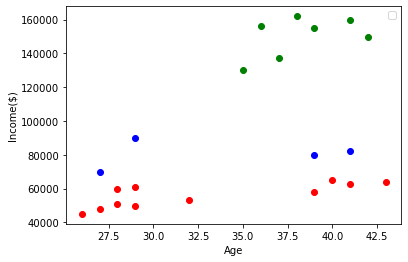

In [30]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

## As we can see from the graph there is some point which got mixed up with 
## another cluster. It happened because of we didn't scale the graph properly 
## So, we need to scale it

In [38]:
## using min max scaler from sklearn
scale= MinMaxScaler()
scale.fit(df[['Income($)']])
df['Income($)'] = scale.transform(df[['Income($)']])
scale.fit(df[['Age']])
df['Age'] = scale.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [39]:
km_new= KMeans(n_clusters=3)
km_new

KMeans(n_clusters=3)

In [41]:
y_new = km_new.fit_predict(df[['Age','Income($)']])
y_new

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [42]:
df['cluster']=y_new
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


No handles with labels found to put in legend.


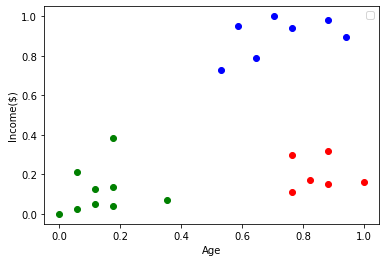

In [46]:
df0  = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'],color="red")
plt.scatter(df1['Age'],df1['Income($)'],color="green")
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()